In [112]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")

In [113]:
#data
data = pd.read_csv('Data/train.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(183, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [114]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [115]:
# describe the dataframe with some statistical info
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [116]:
# check data types in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [117]:
# check unique data for each feature in the dataframe
data.nunique()

PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64

#Countplot of passenger survival

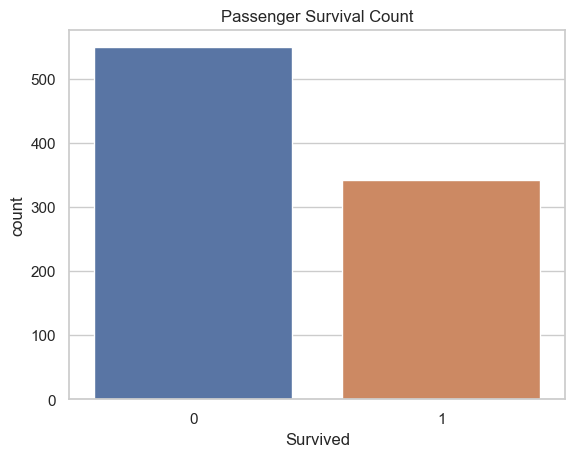

In [118]:
# Read the CSV file and create a DataFrame
data = pd.read_csv('Data/train.csv')
# Set the style of the plot
sns.set(style="whitegrid")
# Create the countplot
sns.countplot(x='Survived', data=data)
# Set the plot title
plt.title('Passenger Survival Count')
# Display the plot
plt.show()

#Countplot of passenger survival by Sex

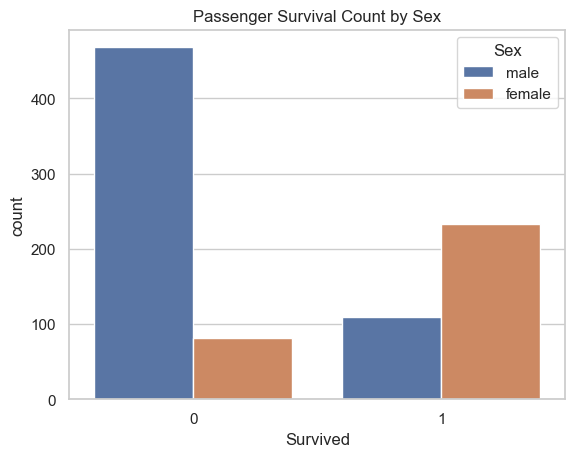

In [119]:
# Read the CSV file and create a DataFrame
data = pd.read_csv('Data/train.csv')
# Set the style of the plot
sns.set(style="whitegrid")
# Create the countplot with hue
sns.countplot(x='Survived', data=data, hue='Sex')
# Set the plot title
plt.title('Passenger Survival Count by Sex')
# Set the legend title
plt.legend(title='Sex')
# Display the plot
plt.show()


#Countplot of passenger survival by Age

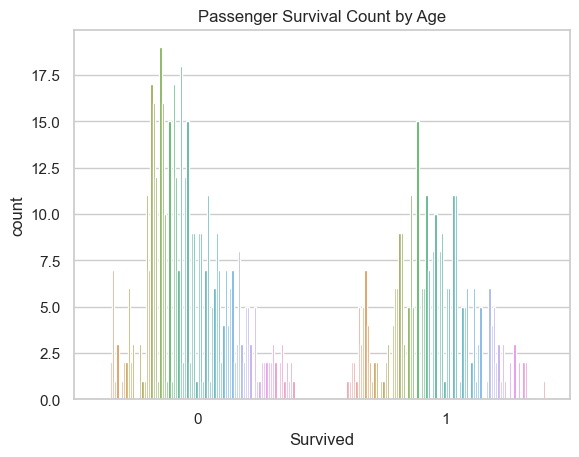

In [120]:
# Read the CSV file and create a DataFrame
data = pd.read_csv('Data/train.csv')
# Set the style of the plot
sns.set(style="whitegrid")
# Create the countplot with hue
plot = sns.countplot(x='Survived', data=data, hue='Age')
# Set the plot title
plt.title('Passenger Survival Count by Age')
# Remove the legend
plot.legend_.remove()
# Display the plot
plt.show()

#Splitting Dataset

In [121]:
train_df = pd.read_csv('Data/train.csv')
test_df=pd.read_csv('Data/test.csv')

In [122]:
print(f"Train Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

Train Data Shape: (891, 12)
Test Data Shape: (418, 11)


In [123]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [124]:
import statistics
train_df["Age"] = train_df["Age"].fillna(train_df.Age.median())
train_df["Embarked"] = train_df["Embarked"].fillna(statistics.mode(train_df.Embarked))

In [125]:
test_df["Age"] = test_df["Age"].fillna(test_df.Age.median())
test_df["Fare"] = test_df["Fare"].fillna(test_df.Fare.median())

#splitting data

In [126]:
# Prepare the training data
X = train_df.drop(["PassengerId", "Name", "Cabin", "Survived", "Ticket"], axis=1)
y = train_df["Survived"]

# Prepare the test data
test = test_df.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [128]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, normalize, MinMaxScaler, OneHotEncoder
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Apply one-hot encoding to "Sex" and "Embarked" columns in X_train, X_test, and test DataFrames
for i in ["Sex","Embarked"]:
    X_train[i] = encoder.fit_transform(pd.DataFrame(X_train[i]))
    X_test[i] = encoder.fit_transform(pd.DataFrame(X_test[i]))
    test[i] = encoder.fit_transform(pd.DataFrame(test[i]))

C:\Users\ksubh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ksubh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ksubh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [129]:
# Create an instance of the MinMaxScaler
sc = MinMaxScaler()
# Define the columns to be scaled
n = ["Pclass","Age","SibSp","Parch","Fare"]

# Apply Min-Max scaling to the specified columns in X_train,X_test,test
X_train[n] = sc.fit_transform(X_train[n])
X_test[n] = sc.fit_transform(X_test[n])
test[n] = sc.fit_transform(test[n])


C:\Users\ksubh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\python\Python37\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\ksubh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [130]:
X_train = normalize(X_train)
X_test = normalize(X_test)

#Building a Logistic Regression model

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_LR = LogisticRegression()

In [132]:
model_LR.fit(X_train, y_train)
y_pred_train = model_LR.predict(X_train)
y_pred_test = model_LR.predict(X_test)

pred_train_acc = accuracy_score(y_train, y_pred_train)
pred_test_acc = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", pred_train_acc)
print("Test Accuracy:", pred_test_acc)


Train Accuracy: 0.7881219903691814
Test Accuracy: 0.7947761194029851


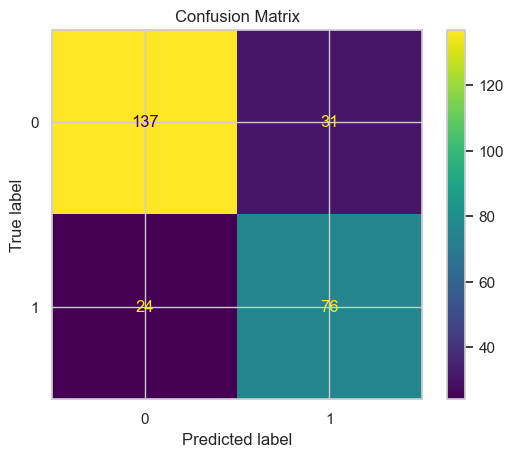

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Fit the logistic regression model and make predictions
model_LR.fit(X_train, y_train)
y_pred_test = model_LR.predict(X_test)

# Plot the confusion matrix
disp = plot_confusion_matrix(model_LR, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")

plt.show()


In [134]:
from sklearn.metrics import classification_report
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       168
           1       0.71      0.76      0.73       100

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268

